# William Ching
# Amazon Reviews Notebook
---

# **Preamble**

In [1]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [2]:
# import relevant Python libraries
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
import seaborn as sns
import json

# **Objectives**

**Summary:**

The Amazon Reviews in Different Languages Dataset from Multilingual Amazon Reviews Corpus, provides text reviews / ratings in .json format in different languages: English, Japanese, German, French, Chinese, and Spanish (6 collections of json data). The reviews and ratings were collected from 2015 to 2019 from products sold on Amazon. For each language there are a total of 200,000 reviews in the training set (1.2 million reviews total). The ratings are balanced among all languages collections. Each record in the dataset has the following independent variables: review text, the review title, the star rating, an anonymized reviewer ID, an anonymized product ID and the coarse-grained product category (e.g. ‘books’, ‘appliances’, etc.). The dataset is separated into distinct json files according to the language of the review. The labels for each review is given in the name of each json file.

**Task for this Dataset:**

The task for this dataset will be a classification task. With this dataset we are attempting to create a machine learning model to accurately classify the language of texts from Amazon product reviews: English, Japanese, German, French, Chinese, and Spanish.

**Type of Machine Learning Problem:**

This problem is a supervised machine learning problem because the labels are provided in the dataset (language of data samples: 6 total). The labels are provided in the respective json file name (i.e. English reviews are provided in the json file with “en” in file name).

**Motivation:**

Increasingly, people are transitioning to online markets, like Amazon, as it becomes easier to place orders and purchase items over the internet. Amazon has been around since 1994 and has since then grown to millions of users around the world and has become a prominent global business. Amazon extended their marketplace to many regions where customers speak different languages. The language of a marketplace does not necessarily always match the language of a review placed by customers. In this project, we are going to try and create a machine learning model to classify the language of each text review: English, Japanese, German, French, Chinese, and Spanish. In essence, we are trying to create a model that can detect the language of texts. Such machine learning model can help break the language barrier between buyers and sellers. I find the concept of Languages and linguistics interesting because they are an integral part of humanity. Languages enable us to share ideas, thoughts and feelings. Every language has its unique rules and syntax, but they allow humans to communicate and express themselves in different ways. Understanding different languages is important for businesses to build connections and grow a network. This project gives us an opportunity to create a machine learning system by using methods learned in class to classify language of texts. 


# **Setup**

#### **Folder Structure:**
```
📂AmazonReviews
 ┃
 ┣ 📙AmazonReviews.ipynb
 ┗ 📂Data
    ┃
    ┣ 📂Test
    ┃  ┣ 📝 dataset_de_test.json
    ┃  ┣ 📝 dataset_en_test.json
    ┃  ┣ 📝 dataset_es_test.json
    ┃  ┣ 📝 dataset_fr_test.json
    ┃  ┣ 📝 dataset_ja_test.json
    ┃  ┗ 📝 dataset_zh_test.json
    ┗ 📂Train
       ┣ 📝 dataset_de_train.json
       ┣ 📝 dataset_en_train.json
       ┣ 📝 dataset_es_train.json
       ┣ 📝 dataset_fr_train.json
       ┣ 📝 dataset_ja_train.json
       ┗ 📝 dataset_zh_train.json
 ```
 #### **Dataset link:**
 https://s3.console.aws.amazon.com/s3/buckets/amazon-reviews-ml/?region=us-west-2&tab=objects
 #### **Kernel:**
 base Python 3.9.12 Conda env

# **1. Brief Exploration of Dataset**

In this section, we will be carry out a brief exploration of our dataset. We must first note that the training data is given in 6 .json file (see folder structure) for each respective langauges: German (de), English (en), Spanish (es), French (fr), Japanese (ja), and Chinese (zh). In order to start any exploration, we must first parse the json data into our python environment.

In [20]:
all_reviews = []
en_reviews = []
de_reviews = []
es_reviews = []
fr_reviews = []
ja_reviews = []
zh_reviews = []
for line in open('Data/Train/dataset_de_train.json', 'r'):
    de_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_en_train.json', 'r'):
    en_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_es_train.json', 'r'):
    es_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_fr_train.json', 'r'):
    fr_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_ja_train.json', 'r'):
    ja_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_zh_train.json', 'r'):
    zh_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))

Now that we have parsed the json data into python lists (en_reviews, de_reviews, es_reviews, fr_reviews, ja_reviews, and zh_reviews) we can now begin our dataset exploration. One of the first details to observe is a sample format / structure of the data.

In [17]:
# sample review data:
print("de_reviews: ",de_reviews[0], "\n")
print("en_reviews: ",en_reviews[0], "\n")
print("es_reviews: ",es_reviews[0], "\n")
print("fr_reviews: ",fr_reviews[0], "\n")
print("ja_reviews: ",ja_reviews[0], "\n")
print("zh_reviews: ",zh_reviews[0], "\n")

de_reviews:  {'review_id': 'de_0203609', 'product_id': 'product_de_0865382', 'reviewer_id': 'reviewer_de_0267719', 'stars': '1', 'review_body': 'Armband ist leider nach 1 Jahr kaputt gegangen', 'review_title': 'Leider nach 1 Jahr kaputt', 'language': 'de', 'product_category': 'sports'} 

en_reviews:  {'review_id': 'en_0964290', 'product_id': 'product_en_0740675', 'reviewer_id': 'reviewer_en_0342986', 'stars': '1', 'review_body': "Arrived broken. Manufacturer defect. Two of the legs of the base were not completely formed, so there was no way to insert the casters. I unpackaged the entire chair and hardware before noticing this. So, I'll spend twice the amount of time boxing up the whole useless thing and send it back with a 1-star review of part of a chair I never got to sit in. I will go so far as to include a picture of what their injection molding and quality assurance process missed though. I will be hesitant to buy again. It makes me wonder if there aren't missing structures and su

It can be seen that each reviews python list contains a list of python dict or objects. We can extract the raw features:

In [5]:
print("Raw Features: ", list(de_reviews[0].keys()))

Raw Features:  ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category']


We see that each json object have the following fields / raw features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'.

Next, we can take a look at the size of each reviews python list:

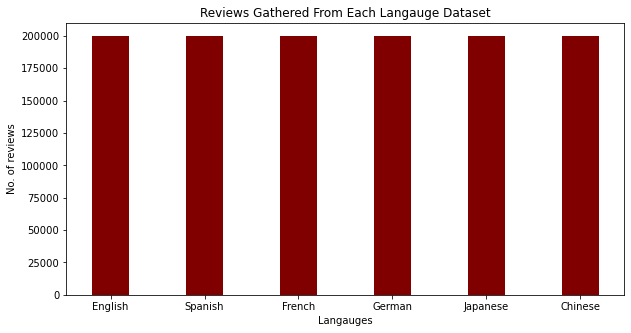

de_reviews size:  200000 reviews

en_reviews size:  200000 reviews

es_reviews size:  200000 reviews

fr_reviews size:  200000 reviews

ja_reviews size:  200000 reviews

zh_reviews size:  200000 reviews

Total number of training samples:  1200000 reviews



In [49]:
# Exploring size of data
langauge_count = {'English': len(en_reviews), 'Spanish': len(es_reviews), 'French': len(fr_reviews), 'German': len(de_reviews), 'Japanese': len(ja_reviews), 'Chinese': len(zh_reviews)}

lang = list(langauge_count.keys())
values = list(langauge_count.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(lang, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Langauges")
plt.ylabel("No. of reviews")
plt.title("Reviews Gathered From Each Langauge Dataset")
plt.show()
print("de_reviews size: ",len(de_reviews), "reviews\n")
print("en_reviews size: ",len(en_reviews), "reviews\n")
print("es_reviews size: ",len(es_reviews), "reviews\n")
print("fr_reviews size: ",len(fr_reviews), "reviews\n")
print("ja_reviews size: ",len(ja_reviews), "reviews\n")
print("zh_reviews size: ",len(zh_reviews), "reviews\n")

print("Total number of training samples: ", len(de_reviews) + len(en_reviews) + len(es_reviews) + len(fr_reviews) + len(ja_reviews) + len(zh_reviews), "reviews\n")


Note that there are a total of 1.2 million reivews with 200,000 reviews from each lanaguage .json file. Based on the dataset, we see that the data is pretty much uniform across all langauges. 

# **2. Pre-processing**

We will begin by extracting the review_body from each langauge dataset.

In [51]:
en_text = []
de_text = []
es_text = []
fr_text = []
ja_text = []
zh_text = []

for i in range(len(en_reviews)):
    en_text.append(en_reviews[i]['review_body'])
    es_text.append(en_reviews[i]['review_body'])
    de_text.append(en_reviews[i]['review_body'])
    fr_text.append(en_reviews[i]['review_body'])
    ja_text.append(en_reviews[i]['review_body'])
    zh_text.append(en_reviews[i]['review_body'])

Arrived broken. Manufacturer defect. Two of the legs of the base were not completely formed, so there was no way to insert the casters. I unpackaged the entire chair and hardware before noticing this. So, I'll spend twice the amount of time boxing up the whole useless thing and send it back with a 1-star review of part of a chair I never got to sit in. I will go so far as to include a picture of what their injection molding and quality assurance process missed though. I will be hesitant to buy again. It makes me wonder if there aren't missing structures and supports that don't impede the assembly process.


We must clean our text data in order to split the texts up into single sentences. Let’s write a function that takes a review and removes double spaces, quotes, and useless punctuation, returning a list of sentences.

In [59]:
def clean_text(reviews_list):
    sentences_cleaned = []
    for txt in reviews_list:
        sentences = []
        txt = txt.replace("?",".")
        txt = txt.replace("!",".")
        txt = txt.replace("»","")
        txt = txt.replace("«","")
        txt = txt.replace(":","")
        txt = txt.replace(";","")
        txt = txt.replace("...",".")
        txt = txt.replace("…",".")
        txt = txt.replace("\n",".")
        txt = txt.replace("  "," ")
        txt = txt.replace("\"","")
        txt = txt.replace("„","")
        sentences = txt.split(".")
        for i in range(len(sentences)):
            sentences[i] = sentences[i].strip()
      
        sentences = [x for x in sentences if x != ""]
        sentences_cleaned = sentences_cleaned + sentences
    return sentences_cleaned

print(len(en_text))
clean_en_text = clean_text(en_text)
print(len(clean_en_text))

200000
591837


In [60]:
print(clean_en_text[0])

Arrived broken


# **3. Feature Extraction / Feature Learning**

# **4. Processing**

# **5. Comparative Analysis**

# **6. Discussion of Ethical Issues**

# **7. Bibliography**

https://docs.opendata.aws/amazon-reviews-ml/readme.html#bibliography

Bojanowski, Piotr, et al. “Enriching word vectors with subword information.” Transactions of the Association for Computational Linguistics 5 (2017): 135-146.

Citation: 

Phillip Keung, Yichao Lu, György Szarvas and Noah A. Smith. “The Multilingual Amazon Reviews Corpus.” In Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing, 2020.

@inproceedings{marc_reviews,
    title={The Multilingual Amazon Reviews Corpus},
    author={Keung, Phillip and Lu, Yichao and Szarvas, György and Smith, Noah A.},
    booktitle={Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing},
    year={2020}
}
